# Modeling Spring Motion with Analytical Model, Computational Model, and Experimental Data

In [100]:
# Import Libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [101]:
# Constants
gravitational_acceleration = 9.81  # m/s^2
mass = 0.2  # kg
computational_spring_constant = 24.338422398666662  # N/m

## Define Computational and Analytical Models

In [102]:
# Computational Model
def computational_model(times, computational_spring_constant, computational_amplitude):
    accelerations = [0]
    velocities = [0]
    displacements = [computational_amplitude]
    for i in range(len(times) - 1):
        velocities.append(velocities[-1] + accelerations[-1] * (times[i + 1] - times[i]))
        displacements.append(displacements[-1] + velocities[-1] * (times[i + 1] - times[i]))
        accelerations.append(-computational_spring_constant * displacements[-1] / mass)
    return accelerations, velocities, displacements

In [103]:
def analytical_model(times, data, time_initial):
    positions = []
    velocities = []
    for time in times:
        positions.append(data["Position (m)"][0] * math.cos(math.sqrt(computational_spring_constant / mass) * (time - time_initial)))
        velocities.append(-data["Position (m)"][0] * math.sqrt(computational_spring_constant / mass) * math.sin(math.sqrt(computational_spring_constant / mass) * (time - time_initial)))
    return positions, velocities

## Define Plotting Function

In [104]:
# Plot Models
def plot_models(times, analytical_positions, computational_positions, data, name):
    plt.plot(times, analytical_positions, label="Analytical Model")
    plt.plot(times, computational_positions, label="Computational Model")
    plt.plot(data["Time (s)"], data["Position (m)"], label="Experimental Data")
    plt.title(f"{name} Models")
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.legend()
    plt.savefig(f"{name}/Models.png", dpi=300)
    plt.show()

## Define Energies Computation Function

In [105]:
# Compute Energies
def compute_energies(positions, velocities, min_position):
    spring_zero_position = -min_position + mass * gravitational_acceleration / computational_spring_constant
    gravitational_potential_energies = []
    elastic_potential_energies = []
    kinetic_energies = []
    total_energies = []
    for i in range(len(positions)):
        gravitational_potential_energies.append(mass * gravitational_acceleration * positions[i])
        elastic_potential_energies.append(computational_spring_constant * (spring_zero_position - positions[i]) ** 2 / 2) # start pos - pos [i]
        kinetic_energies.append(mass * velocities[i] ** 2 / 2)
        total_energies.append(
            gravitational_potential_energies[-1] + elastic_potential_energies[-1] + kinetic_energies[-1])
    return gravitational_potential_energies, elastic_potential_energies, kinetic_energies, total_energies

## Define Energies Plotting Function

In [106]:
# Compute and Plot Energies
def plot_energies(times, positions, velocities, name):
    min_position = min(positions)
    calibrated_positions = [position - min_position for position in positions]
    gravitational_potential_energies, elastic_potential_energies, kinetic_energies, total_energies = compute_energies(calibrated_positions, velocities, min_position)
    plt.plot(times[:-1], gravitational_potential_energies[:-1], label="Gravitational Potential Energy")
    plt.plot(times[:-1], elastic_potential_energies[:-1], label="Elastic Potential Energy")
    plt.plot(times[:-1], kinetic_energies[:-1], label="Kinetic Energy")
    plt.plot(times[:-1], total_energies[:-1], label=f"Total Energy (Disagreement = {statistics.stdev(total_energies[:-1]) / statistics.mean(total_energies[:-1]) * 100:.4f}%)")
    plt.title(f"{name} Energies")
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.legend()
    plt.savefig(f"{name}Energies.png", dpi=300)
    plt.show()

## Define Models Creation, Models Plotting, and Energy Plotting Function

In [107]:
# Compute Models
def compute_models(data, name):
    # Generate a list of times
    times = np.linspace(data["Time (s)"][0], data["Time (s)"].iat[-1], 10000)
    # Calculate velocities
    data_velocities = [0]
    for i in range(len(data["Time (s)"]) - 2):
        data_velocities.append((data["Position (m)"][i + 2] - data["Position (m)"][i]) / (data["Time (s)"][i + 2] - data["Time (s)"][i]))
    data_velocities.append((data["Position (m)"][i + 1] - data["Position (m)"][i]) / (data["Time (s)"][i + 1] - data["Time (s)"][i]))
    # Compute Computational Model
    computational_accelerations, computational_velocities, computational_positions = computational_model(times, computational_spring_constant, data["Position (m)"][0])
    # Compute Analytical Model
    analytical_positions, analytical_velocities = analytical_model(times, data, data["Time (s)"][0])
    # Plot Models
    plot_models(times, analytical_positions, computational_positions, data, name)
    # Plot Energies
    plot_energies(times, computational_positions, computational_velocities, f"{name}/Computational")
    plot_energies(times, analytical_positions, analytical_velocities, f"{name}/Analytical")
    plot_energies(data["Time (s)"], data["Position (m)"], data_velocities, f"{name}/Experimental")

## Load Experimental Data and Plot Models and Energies

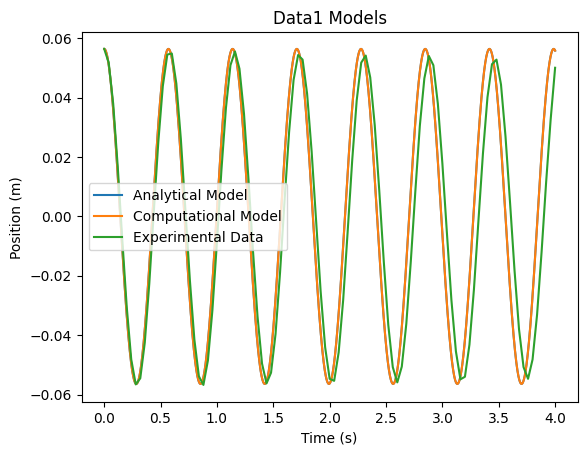

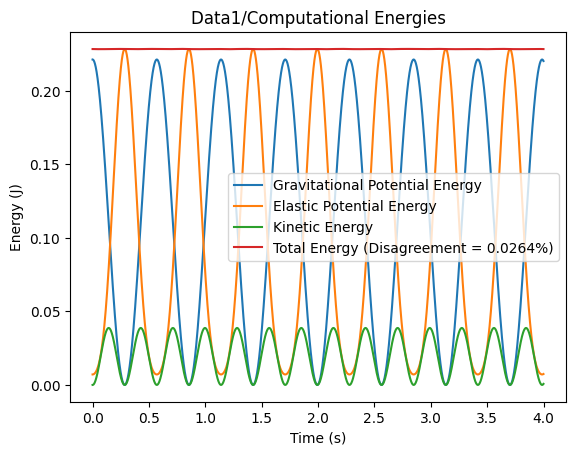

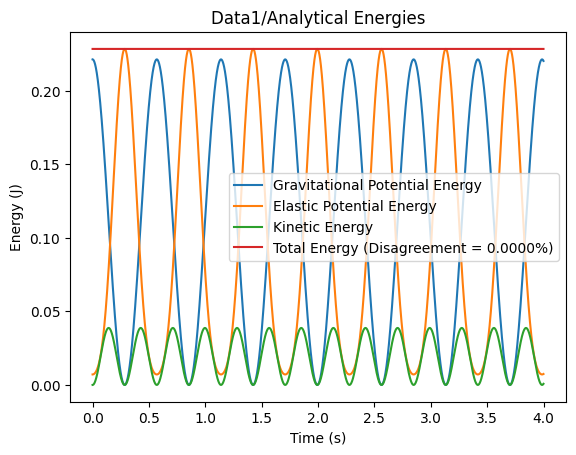

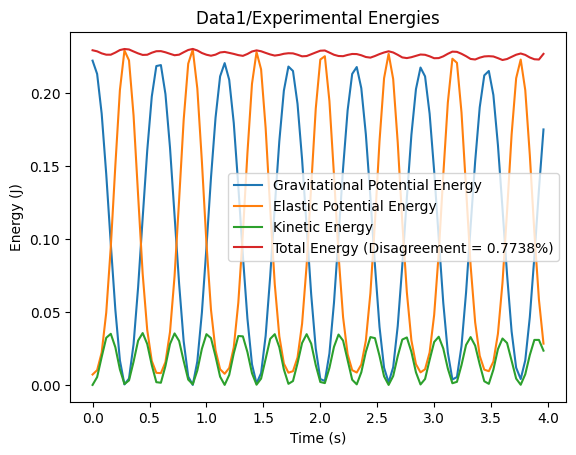

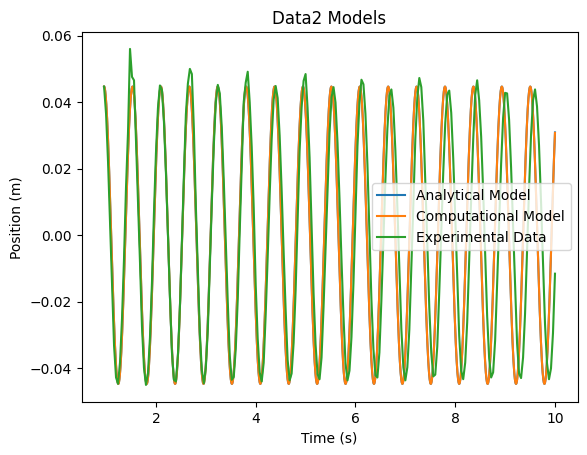

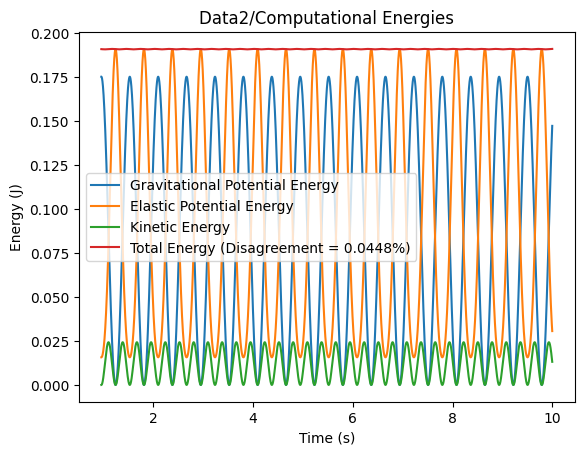

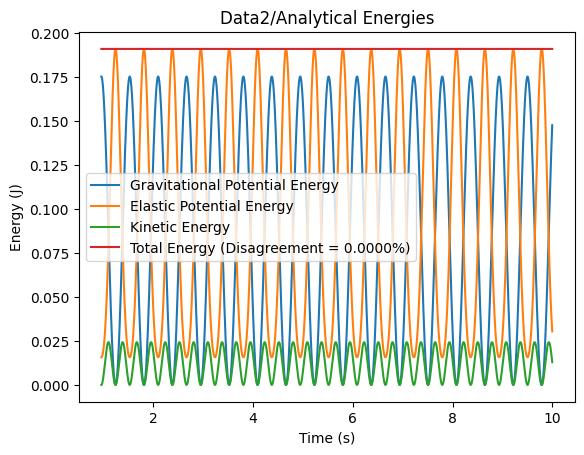

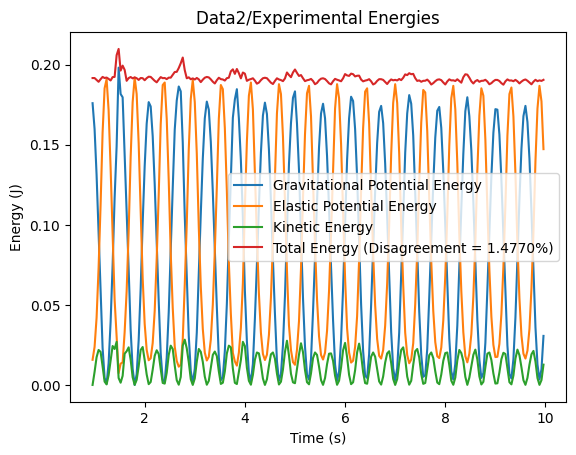

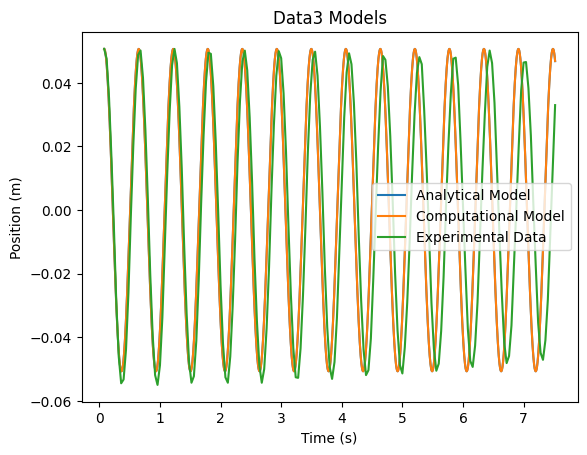

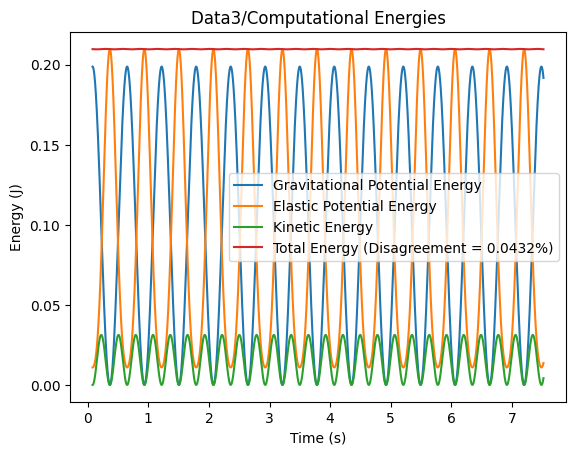

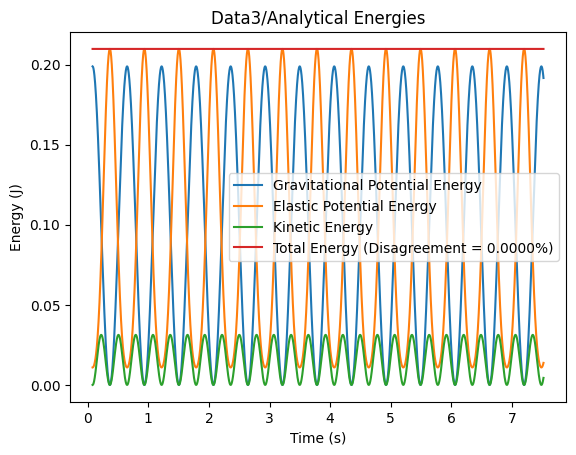

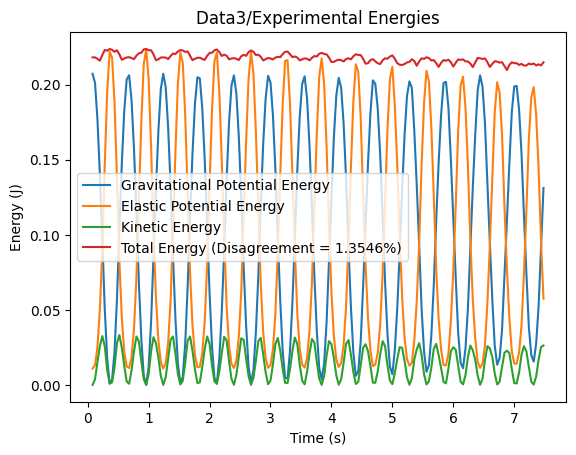

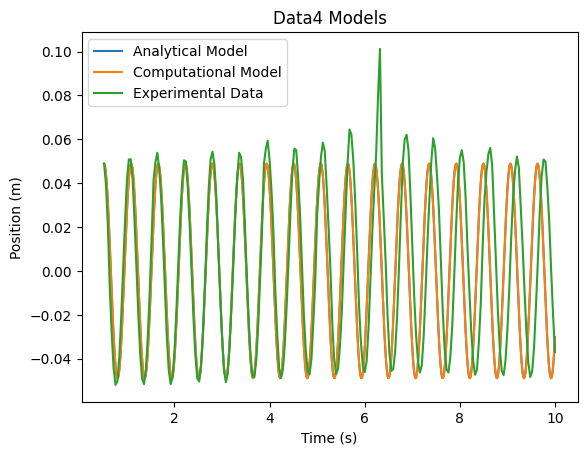

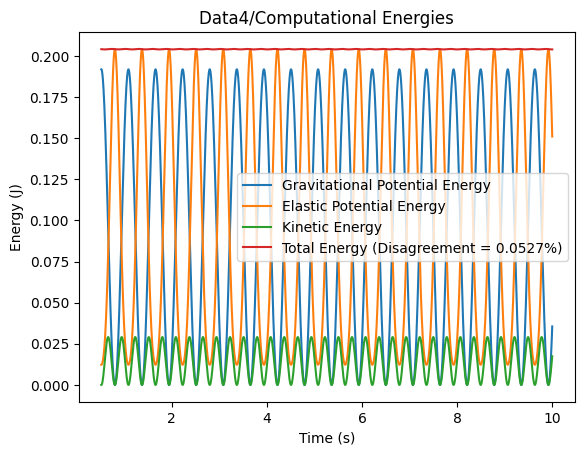

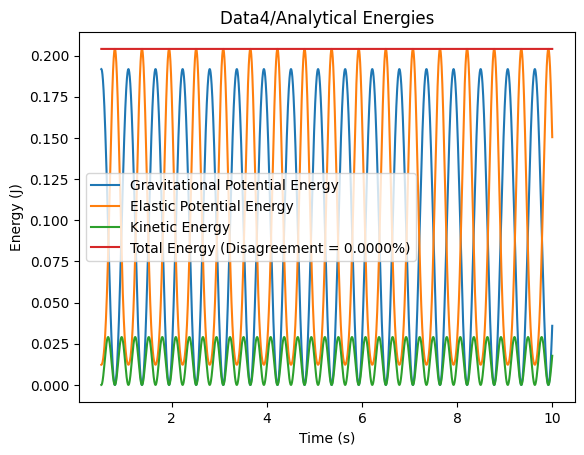

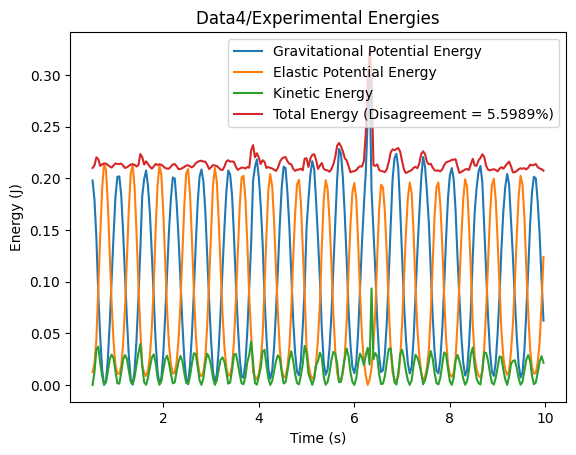

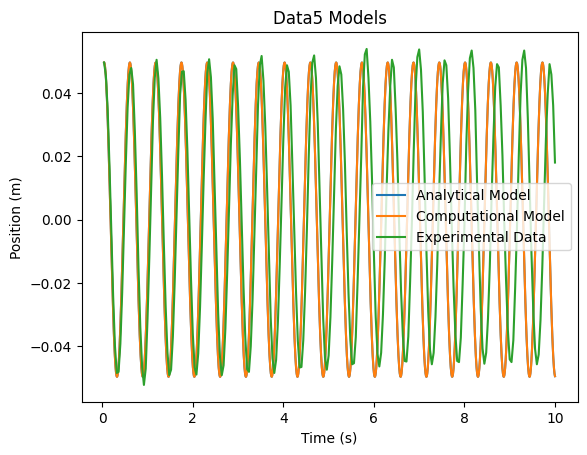

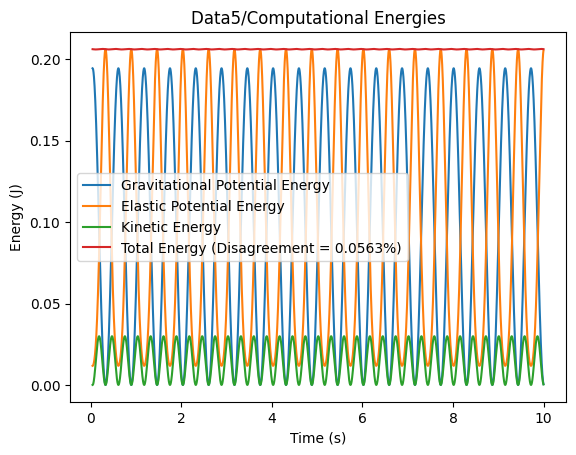

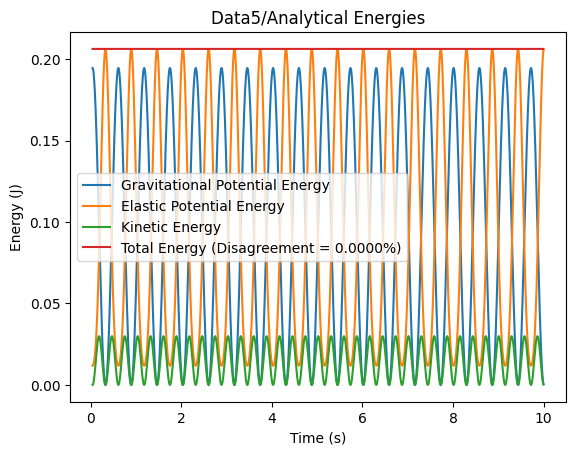

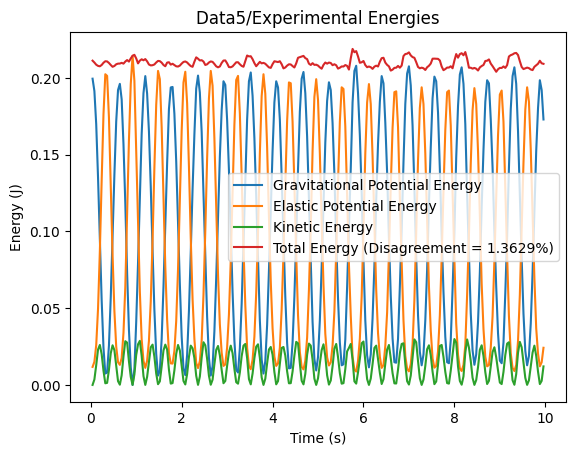

In [108]:
# Load experimental data and fit models
compute_models(pd.read_csv("Data1/Data.csv"), "Data1")
compute_models(pd.read_csv("Data2/Data.csv"), "Data2")
compute_models(pd.read_csv("Data3/Data.csv"), "Data3")
compute_models(pd.read_csv("Data4/Data.csv"), "Data4")
compute_models(pd.read_csv("Data5/Data.csv"), "Data5")